<a href="https://colab.research.google.com/github/robert-myers/myanimelist-recommender/blob/master/notebooks/show_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install jikanpy && pip install surprise

In [0]:
import dill as pickle
import urllib.request

from jikanpy import Jikan
from PIL import Image

In [0]:
jikan = Jikan()

In [4]:
%%time
with open('/content/drive/My Drive/jars/recommender.pickle', 'rb') as f:
  malr = pickle.load(f)

CPU times: user 1min 22s, sys: 11.7 s, total: 1min 34s
Wall time: 1min 37s


In [0]:
def show_me(user, randomize=False, filter_completed=True):
  if randomize:
    recommendations = malr.get_recommendations(user, num_titles=20, filter_completed=filter_completed)
    url = recommendations.sample()["image_url"].iloc[0]
  else:
    url = malr.get_recommendations(user, num_titles=1, filter_completed=filter_completed)["image_url"].iloc[0]
  image = Image.open(urllib.request.urlopen((url)))
  return image

In [6]:
%%time
stark700_recommendations = malr.get_recommendations("Stark700") # this user has over 3000 completed titles

CPU times: user 946 ms, sys: 16.5 ms, total: 963 ms
Wall time: 1min 13s


In [0]:
def url_to_image(url):
  try:
    return Image.open(urllib.request.urlopen((url)))
  except:
    url = "https://cdn.myanimelist.net/images/error/404_image@2x.png?v=170126"
    return Image.open(urllib.request.urlopen((url)))

stark700_recommendations["image_url"] = stark700_recommendations["image_url"].apply(url_to_image)

In [0]:
!mkdir tmp

In [0]:
for i, image in enumerate(stark700_recommendations["image_url"]):
  image.save(f"tmp/thumbnail_{i}.png")

In [12]:
stark700_recommendations[["title"]]

,title
34,One Piece
12724,Ginga Eiyuu Densetsu
1028,Kimi no Na wa.
6493,Ashita no Joe 2
6481,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...
7105,Sen to Chihiro no Kamikakushi
12322,Detective Conan
641,Mobile Suit Gundam Unicorn
2258,Howl no Ugoku Shiro
5350,Slam Dunk


One Piece


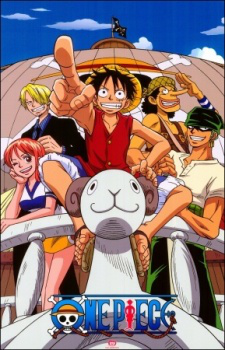

In [14]:
print(stark700_recommendations.iloc[0]["title"])
stark700_recommendations.iloc[0]["image_url"]

Ginga Eiyuu Densetsu


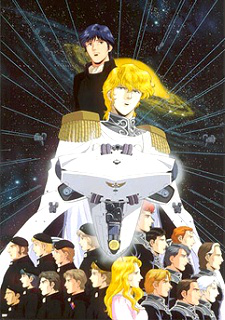

In [15]:
print(stark700_recommendations.iloc[1]["title"])
stark700_recommendations.iloc[1]["image_url"]

Kimi no Na wa.


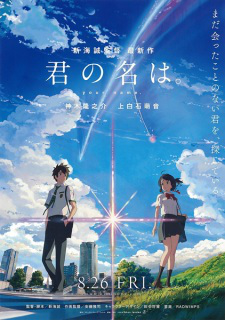

In [16]:
print(stark700_recommendations.iloc[2]["title"])
stark700_recommendations.iloc[2]["image_url"]

Ashita no Joe 2


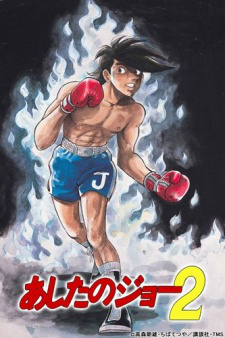

In [17]:
print(stark700_recommendations.iloc[3]["title"])
stark700_recommendations.iloc[3]["image_url"]

Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen


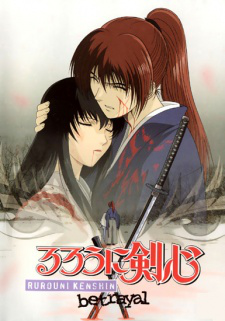

In [18]:
print(stark700_recommendations.iloc[4]["title"])
stark700_recommendations.iloc[4]["image_url"]

Sen to Chihiro no Kamikakushi


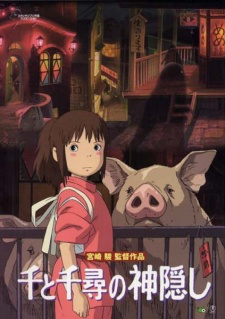

In [19]:
print(stark700_recommendations.iloc[5]["title"])
stark700_recommendations.iloc[5]["image_url"]

Detective Conan


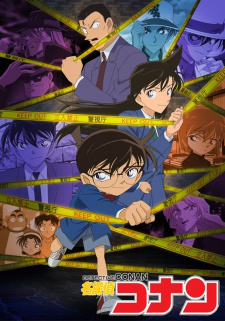

In [20]:
print(stark700_recommendations.iloc[6]["title"])
stark700_recommendations.iloc[6]["image_url"]

Mobile Suit Gundam Unicorn


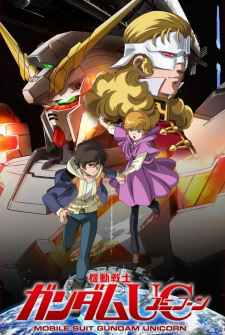

In [21]:
print(stark700_recommendations.iloc[7]["title"])
stark700_recommendations.iloc[7]["image_url"]

Howl no Ugoku Shiro


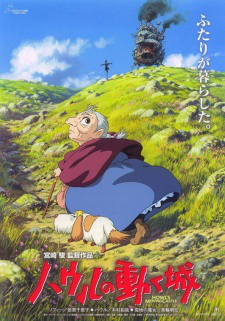

In [22]:
print(stark700_recommendations.iloc[8]["title"])
stark700_recommendations.iloc[8]["image_url"]

Slam Dunk


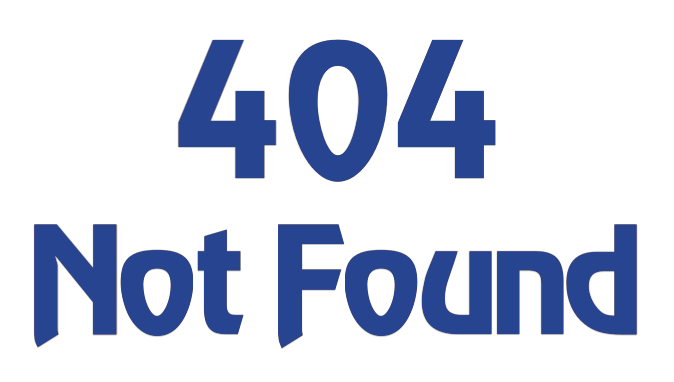

In [23]:
print(stark700_recommendations.iloc[9]["title"])
stark700_recommendations.iloc[9]["image_url"] # returns 404 when image link is broken